# Data Preprocessing & Feature Engineering:
Now that we've wrangled our data and have done some exploratory analysis, let's move onto the feature engineering step.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#Importing the dataframe we saved from our previous "Data Wrangling and Exploratory Data Analysis" Notebook
df = pd.read_csv('WnvDataframe',parse_dates = ['Date'])

# Feature 1: Creating Days of the Week

In [3]:
daysofweek = []
for date in df['Date'].dt.dayofweek:
    if date == 0:
        daysofweek.append('Monday')
    elif date == 1:
        daysofweek.append('Tuesday')
    elif date == 2:
        daysofweek.append('Wednesday')
    elif date == 3:
        daysofweek.append('Thursday')
    elif date == 4:
        daysofweek.append('Friday')
    elif date == 5:
        daysofweek.append('Saturday')
    else:
        daysofweek.append('Sunday')
df['DayOfWeek'] = daysofweek
df2 = pd.get_dummies(df, columns=['DayOfWeek'],prefix='',prefix_sep='')

In [4]:
df.groupby('DayOfWeek').sum()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,140719,157547.1691,-330152.5122,30183,40740,135,299186.0,234001.0,267550.0,775.0,...,0,288,0,1609,0,0,523,688,0,0
Monday,42747,55040.5721,-115356.2525,10389,16469,16,113040.0,86912.0,100182.0,7893.0,...,0,178,0,254,0,0,0,317,0,0
Thursday,91494,107775.2096,-225906.4633,20199,34710,215,207314.5,159131.0,183833.0,5218.0,...,0,760,0,734,0,0,233,374,0,121
Tuesday,38591,44193.1018,-92601.9271,8197,11514,68,89049.0,68199.0,78894.0,5961.0,...,0,281,0,360,0,0,23,93,0,254
Wednesday,61385,75026.9388,-157358.0846,13184,31606,117,152031.5,120434.5,136715.0,8942.0,...,0,773,0,728,0,0,544,637,0,129


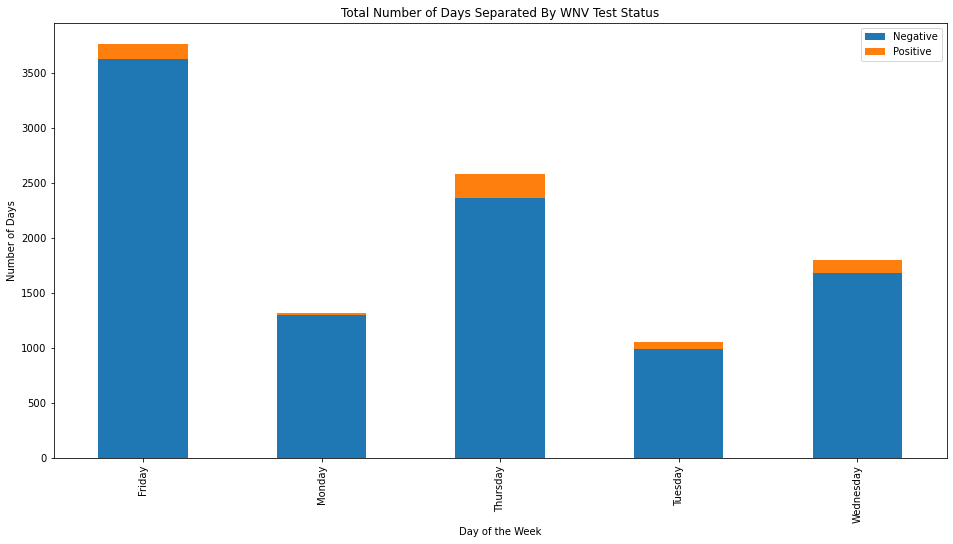

In [5]:
df['Counter'] = 1
df_dayofweek = df.groupby(['DayOfWeek','WnvPresent']).sum()
plt.rcParams["figure.figsize"] = (16,8)
df_dayofweek.Counter.unstack().plot.bar(stacked=True)
plt.title('Total Number of Days Separated By WNV Test Status')
plt.legend(labels=['Negative','Positive'])
plt.ylabel('Number of Days')
plt.xlabel('Day of the Week')
plt.show();

# Feature 2: Days Since Previous Weather Condition

In [11]:
df2['TimeSincePreviousWnvPresent'] = df2['Date'] - df2['Date'].where(df2['WnvPresent']==1).groupby(df2['Date']).ffill()

In [37]:
df2['Date'] - df2.groupby(df2['HZ'].eq(1).cumsum())['Date'].transform('min')

0       0 days
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
10501   7 days
10502   7 days
10503   7 days
10504   7 days
10505   7 days
Name: Date, Length: 10506, dtype: timedelta64[ns]

In [52]:
df2['TimeSinceLastHZ'] = df2['Date'] - df2.groupby(df2['HZ'].eq(1).cumsum())['Date'].transform('min')
# There are ~two year gaps between the data - we want to mark off the start of a new year of data with "N/A" instead of 600+ days
for i in range(len(df2['TimeSinceLastHZ'])):
    if df2['TimeSinceLastHZ'][i] > pd.Timedelta(days=365):
        df2['TimeSinceLastHZ'][i] = np.nan
    else:
        pass
df2['TimeSinceLastHZ'].value_counts()

C:\Users\jhua\AppData\Local\Temp\ipykernel_25496\2836826595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TimeSinceLastHZ'][i] = np.nan


0 days     2280
14 days     745
7 days      688
6 days      577
15 days     425
21 days     360
28 days     345
18 days     305
3 days      303
4 days      270
11 days     212
5 days      210
1 days      204
8 days      197
46 days     190
35 days     186
22 days     182
42 days     181
56 days     167
49 days     157
25 days     140
10 days     138
32 days     128
69 days     127
77 days     125
13 days     123
20 days     121
39 days     119
66 days     111
34 days     105
12 days      93
17 days      83
83 days      65
52 days      62
55 days      55
48 days      54
19 days      23
Name: TimeSinceLastHZ, dtype: int64